<a href="https://colab.research.google.com/github/Tulkin85/hello-world/blob/master/Python_For_Finance_Cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib as plt
%matplotlib inline


In [6]:
!pip install yfinance
!pip install backtrader

     |████████████████████████████████| 5.5MB 6.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=da5c796120b8f9a881799e4f8df69826708f7bfb08d9a9c7dc91c48255b52e7d
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [7]:

from datetime import datetime
import backtrader as bt
import yfinance as yf

In [8]:

class SmaSignal(bt.Signal):
    params = (('period', 20), )
    
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

In [9]:
aapl_df = yf.download('AAPL', 
                      start='2018-01-01', 
                      end='2018-12-31',
                      progress=False,
                      auto_adjust=True)

aapl_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,40.604423,41.115081,40.389659,41.105534,102223600
2018-01-03,41.169962,41.651985,41.033947,41.098373,118071600
2018-01-04,41.172341,41.394264,41.062576,41.289268,89738400
2018-01-05,41.387107,41.847651,41.294043,41.759361,94640000
2018-01-08,41.604263,41.904929,41.504038,41.604263,82271200


In [10]:
data = bt.feeds.PandasData(dataname=aapl_df)

In [11]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [12]:
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1002.84


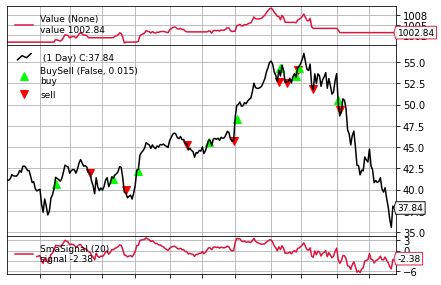

[[<Figure size 432x288 with 3 Axes>]]

In [28]:
cerebro.plot(iplot=False, volume=False, figsize=(12,6))

In [21]:
cerebro.plot()

[[<Figure size 432x288 with 3 Axes>]]